In [72]:
# Dataset: Natural Language to Python Code
#Author: Link An Jarad
# Source: Link An Jarad. (2022). Natural Language to Python Code [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/3512475
# URL: https://www.kaggle.com/datasets/linkanjarad/coding-problems-and-solution-python-code
# Description: Link An Jarad (2022) developed this data set to generate python code
# from Natural Language Text with code functionality descriptions.

In [73]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re


In [74]:
#Dataset is Loaded to df_raw Dataframe
df_raw = pd.read_csv('../data/raw/Kaggel/ProblemSolutionPythonV3.csv')

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307 entries, 0 to 3306
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3307 non-null   int64 
 1   Problem      3307 non-null   object
 2   Python Code  3306 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.6+ KB


In [75]:
#Dataset contains 3307 rows, with 3 columns 
#First column does not provides any valid information as it is not labeled and it is not described on the Data Dictionary
#'Python Code' Column contains a Null entry.
#Both 'Problem' and 'Python Code' Columns are strings (object)

In [76]:
df_raw.shape

(3307, 3)

In [77]:
df_raw.sample(10, random_state=2010)

,Unnamed: 0,Problem,Python Code
3290,3290,Find out all Sunny numbers present within a gi...,"\r\nimport math\r\nprint(""Enter a range:"")\r\n..."
450,450,Write a Python program to remove newline chara...,def remove_newlines(fname):\r\n flist = ope...
1847,1847,Write a Python program to Merging two Dictiona...,"\ndef Merge(dict1, dict2):\r\n return(dict2..."
2551,2551,Python Program to Determine all Pythagorean Tr...,"limit=int(input(""Enter upper limit:""))\r\nc=0\..."
3167,3167,Python Program to Compute Simple Interest Give...,"\r\nprinciple=float(input(""Enter the principl..."
1082,1082,Write a Python program to get a string from a ...,def change_char(str1):\r\n char = str1[0]\r\n...
990,990,Write a Pandas program to subtract two timesta...,"import pandas as pd\r\nprint(""Subtract two tim..."
3297,3297,Find sum multiplication and an average of two ...,"\r\nnum1=int(input(""Enter a number:""))\r\nnum2..."
221,221,Write a Pandas program to find which years hav...,import pandas as pd \r\n\r\n\nw_a_con = pd.rea...
1748,1748,Write a Python program to Convert List to List...,"\n\n\n \r\n\ntest_list = [""Gfg"", 3, ""is"", 8, ..."


In [78]:
#From multiple samples of the raw data, it is visible that the Python Code column contains multiple symbol characters, like single 
#quotes, curly braces, square brackets, line jump, and more.

#Problem Column also contains symbol characters like $, -, (, ), and more.


In [79]:
df_raw.columns

Index(['Unnamed: 0', 'Problem', 'Python Code'], dtype='object')

In [80]:
#Drop 'Unnamed: 0' Column as it is an unnecesary column.
df_processed = df_raw.drop(df_raw.columns[0], axis=1).copy()

df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307 entries, 0 to 3306
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Problem      3307 non-null   object
 1   Python Code  3306 non-null   object
dtypes: object(2)
memory usage: 51.8+ KB


In [81]:
#NAN Values are droped from the Dataset
df_processed.isna().sum()

Problem        0
Python Code    1
dtype: int64

In [82]:
df_processed = df_processed.dropna(axis=0, how='any') #drop every row were there is column with a Nan value

df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3306 entries, 0 to 3306
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Problem      3306 non-null   object
 1   Python Code  3306 non-null   object
dtypes: object(2)
memory usage: 77.5+ KB


In [83]:
df_processed.sample(10)

,Problem,Python Code
1108,Write a NumPy program to convert angles from r...,"import numpy as np\r\nx = np.array([-np.pi, -n..."
1831,Maximum of two numbers in Python,"\n\n\r\n\r\n\r\n\r\ndef maximum(a, b):\r\n ..."
1456,Write a NumPy program to compute the Kronecker...,"import numpy as np\r\na = np.array([1,2,3])\r\..."
1940,Difference of two columns in Pandas dataframe ...,import pandas as pd\r\n \r\n\ndf1 = { 'Name':...
783,Write a Pandas program to import given excel d...,import pandas as pd\r\nimport numpy as np\r\nd...
3104,Check whether number is Disarium Number or Not,"\r\nimport math\r\nnum=int(input(""Enter a numb..."
1832,Simple Diamond Pattern in Python,\n\nsize = 8\r\n\r\n\r\n\nspaces = size\r\n\r\...
1696,Write a Python program to find common elements...,"\n\n \r\ndef IntersecOfSets(arr1, arr2, arr3)..."
1057,Write a Python program to display vertically e...,"text = [""a"", ""b"", ""c"", ""d"",""e"", ""f""]\r\nprint(..."
2066,Calculate the sum of the diagonal elements of ...,\nimport numpy as np\r\n \r\n\nn_array = np.a...


In [84]:
df_processed['Problem'].value_counts()

Problem
Write a program to print the alphabet pattern                                                                                                                                              8
Program to Find subtraction of two matrices                                                                                                                                                6
Write a program to print the pattern                                                                                                                                                       5
Program to display a lower triangular matrix                                                                                                                                               4
Program to find the sum of an upper triangular matrix                                                                                                                                      4
                                               

In [85]:
#From Problem Column Value Count it is visible that the same problem description can have multiple solutions, as the
#same value from Problem Column appears multiple times. 

In [86]:
df_processed[df_processed['Problem']=='Write a program to print the alphabet pattern']

,Problem,Python Code
2798,Write a program to print the alphabet pattern,"\r\n\r\nprint(""Enter the row and column size:""..."
2897,Write a program to print the alphabet pattern,"\r\n\r\nprint(""Enter the row and column size:""..."
2907,Write a program to print the alphabet pattern,"\r\nprint(""Enter the row and column size:"")\r\..."
3038,Write a program to print the alphabet pattern,"\r\n\r\nprint(""Enter the row and column size:""..."
3098,Write a program to print the alphabet pattern,"\r\n\r\nprint(""Enter the row and column size:""..."
3122,Write a program to print the alphabet pattern,"\r\n\r\nprint(""Enter the row and column size:""..."
3154,Write a program to print the alphabet pattern,"\r\n\r\nprint(""Enter the row and column size:""..."
3249,Write a program to print the alphabet pattern,"\r\nprint(""Enter the row and column size:"")\r\..."


In [87]:
#By Manually comparing the 'Python Code' Values, it is confirmed that there are duplicated values on the Dataset, having the 
#same 'Problem' Description, and 'Python Code' Solution.
#It is also confirmed from previous Code Chunk, that the same 'Problem' Description can have multiple 'Python Code' Solution

In [88]:
df_processed['Python Code'].value_counts()

Python Code
\nrow_size=int(input("Enter the row Size Of the Matrix:"))\r\ncol_size=int(input("Enter the columns Size Of the Matrix:"))\r\n\r\nmatrix=[]\r\n\nprint("Enter the Matrix Element:")\r\nfor i in range(row_size):\r\n    matrix.append([int(j) for j in input().split()])\r\n\r\nmatrix1=[]\r\n\nprint("Enter the Matrix Element:")\r\nfor i in range(row_size):\r\n    matrix1.append([int(j) for j in input().split()])\r\n\r\n\nsub_matrix=[[0 for i in range(col_size)] for i in range(row_size)]\r\nfor i in range(len(matrix)):\r\n    for j in range(len(matrix[0])):\r\n        sub_matrix[i][j]=matrix[i][j]-matrix1[i][j]\r\n\r\n\nprint("Subtraction of the two Matrices is:")\r\nfor m in sub_matrix:\r\n    print(m)                                                                                                                                                                                                                                                                                            

In [89]:
#From 'Python Code' Value Counts it is confirmed that there are repeated values for this column.

In [90]:
# Some of the Entries contain C or C++ Code
filtered_df = df_processed[df_processed['Python Code'].str.contains('C\+\+')]
filtered_df.to_csv('../data/processed/filteredCPP.csv')

In [91]:
#Drop Entries where C++ code is used instead of Python
df_processed = df_processed.drop([1702,1974,2007,2012,2206,2228,2251,2257,2312,2400,2413], axis=0)
df_processed.reset_index(drop=True)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3295 entries, 0 to 3306
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Problem      3295 non-null   object
 1   Python Code  3295 non-null   object
dtypes: object(2)
memory usage: 77.2+ KB


In [92]:
def code_compiles(source_code):
    try:
        compile(source_code, '', 'exec')        
        return True
    except SyntaxError:
        return False

In [93]:
df_processed['Compiles'] = df_processed['Python Code'].apply(lambda x: code_compiles(x))
df_processed.sample(10)

,Problem,Python Code,Compiles
145,rite a Python program that accepts a sequence ...,lines = []\r\nwhile True:\r\n l = input()\r...,True
1197,Write a Python program to convert an array to ...,"from array import *\r\nprint(""Bytes to String:...",True
385,Write a NumPy program to read a CSV data file ...,from numpy import genfromtxt\r\ncsv_data = gen...,True
2466,Find out all Disarium numbers present within a...,"\r\nimport math\r\nprint(""Enter a range:"")\r\n...",False
2513,Division Two Numbers Operator without using Di...,"\r\nnum1=int(input(""Enter first number:""))\r\n...",False
2878,Python Program to Find the Sum of Digits in a ...,"\r\nn=int(input(""Enter a number:""))\r\ntot=0\...",False
948,Write a Pandas program to create a dataframe a...,import pandas as pd\r\ndf = pd.DataFrame({\r\n...,True
134,Write a NumPy program to extract first element...,"import numpy as np\r\narra_data = np.arange(0,...",True
3171,Program to find the sum of an upper triangular...,"\nrow_size=int(input(""Enter the row Size Of th...",True
1734,How To Convert Python Dictionary To JSON,import json \r\n \r\n\ndictionary ={ \r\n...,False


In [94]:
df_processed['Compiles'].value_counts()

Compiles
True     1933
False    1362
Name: count, dtype: int64

In [95]:
df_processed[df_processed['Compiles']==True].to_csv('../data/processed/processed_notcompile.csv')

In [96]:
df_processed = df_processed[df_processed['Compiles']==True]
df_processed.reset_index(drop=True, inplace=True)
df_processed.sample(10)

,Problem,Python Code,Compiles
1851,Python Program to Find the Power of a Number U...,"def power(base,exp):\r\n if(exp==1):\r\n ...",True
1390,Write a Python program to find the dimension o...,def matrix_dimensions(test_list):\r\n row =...,True
1760,Program to display a lower triangular matrix,"\nrow_size=int(input(""Enter the row Size Of th...",True
1315,Write a NumPy program to save a given array to...,import numpy as np\r\nimport os\r\nx = np.aran...,True
690,Write a Python program to find shortest list o...,def test(dictt):\r\n min_value=1\r\n res...,True
101,Write a Python program to convert Python dicti...,"import json\r\nj_str = {'4': 5, '6': 7, '1': 3...",True
1738,Convert temperature from Fahrenheit to Celsius,"\r\nfahrenheit=int(input(""Enter degree in fahr...",True
1826,Python Program to Count the Frequency of Words...,"test_string=raw_input(""Enter string:"")\r\nl=[]...",True
1264,Write a Pandas program to filter all records s...,import pandas as pd\r\n\nw_a_con = pd.read_csv...,True
1297,Write a Pandas program to split the following ...,import pandas as pd\r\npd.set_option('display....,True


In [97]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Problem      1933 non-null   object
 1   Python Code  1933 non-null   object
 2   Compiles     1933 non-null   bool  
dtypes: bool(1), object(2)
memory usage: 32.2+ KB


In [98]:
df_processed = df_processed.drop(['Compiles'], axis=1)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Problem      1933 non-null   object
 1   Python Code  1933 non-null   object
dtypes: object(2)
memory usage: 30.3+ KB


In [99]:
#Stop Words is Loaded to remove unnecesary words from the 'Problem' column text
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/arnaldochm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [100]:
#CREATE PREPROCESSOR

#As 'Problem' Descriptions are in english, english stop words are downloaded
stop_words = stopwords.words('english')

#Se eliminan las palabras innecesarias/reduntates: and, or, ...
def remove_stopwords(text:str)->str:
    clean_text = []
    eliminited_text = []
    if text is not None:
        words = text.split()
        for word in words:
            if word not in stop_words:
                clean_text.append(str(word))
            else:
                eliminited_text.append(str(word))
        return (' '.join(clean_text),' '.join(eliminited_text))
    else:
        return None

def remove_symbols(text:str)->str:
    if text is not None:
        text = text.lower()
        text = re.sub(r'''[.,?*&'"+${}-]''','',text) #PREGUNTA PARA MANU: SIMBOLOS IMPORTATES PARA LA DESCRIPCION? (), %
        text = re.sub(r"\n",' ',text)
        text = text.strip()
        return text
    else:
        return None

In [21]:
#Cuando en el problema nos dan un $, o un caracter no comun.
# podemos cambiarlo por un texto no representativo
#El stop words me elimina el "to", por ejemplo. En problemas como "got from a to b"

In [101]:
#New Column 'clean_problem' is created applying the preprocessor to remove stopwords and symbols
df_processed['clean_problem'] = df_processed['Problem'].apply(lambda x: remove_symbols(x))
df_processed['clean_problem'] = df_processed['clean_problem'].apply(lambda x: remove_stopwords(x)[0])

In [102]:
#Check removed words:
removed_stopwords = df_processed['clean_problem'].apply(lambda x: remove_stopwords(x)[1])

removed_stopwords

0        
1        
2        
3        
4        
       ..
1928     
1929     
1930     
1931     
1932     
Name: clean_problem, Length: 1933, dtype: object

In [103]:
df_processed.sample(10, random_state= 2045)

,Problem,Python Code,clean_problem
305,Write a Python program to create a multidimens...,nums = []\r\n\r\nfor i in range(3):\r\n\r\n ...,write python program create multidimensional l...
1269,Write a Pandas program to create the todays da...,import pandas as pd\r\nfrom datetime import da...,write pandas program create todays date
1362,Write a Pandas program to create a Pivot table...,import pandas as pd\r\nimport numpy as np\r\nd...,write pandas program create pivot table find s...
470,Write a NumPy program to check whether a Numpy...,import numpy as np\r\nnum = np.arange(20)\r\na...,write numpy program check whether numpy array ...
1906,Find the length of the string using the inbuil...,"\r\nstr=input(""Enter the String:"")\r\nprint(""Y...",find length string using inbuilt function
1676,br/>,"row_num = int(input(""Input number of rows: ""))...",br/>
508,Write a Python program to filter a list of int...,"nums = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]\r\nprin...",write python program filter list integers usin...
913,Write a Python program to find the first non-r...,def first_non_repeating_character(str1):\r\n ...,write python program find first nonrepeating c...
1714,How to get the Daily News using Python,import requests\r\nfrom bs4 import BeautifulSoup,get daily news using python
113,Write a Pandas program to extract the column l...,import pandas as pd\r\nimport numpy as np\r\nd...,write pandas program extract column labels sha...


In [104]:
#Duplicated entries discovered during the previuos analysis are removed from the Dataset.
#Duplicates are considered only for 'clean_problem' and 'Python Code' colums as a single point or other symbols 
#on the 'Problem' Column can avoid to identify a duplicated entry.
df_processed = df_processed.drop_duplicates(subset=['Python Code', 'clean_problem'])

In [105]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1863 entries, 0 to 1932
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Problem        1863 non-null   object
 1   Python Code    1863 non-null   object
 2   clean_problem  1863 non-null   object
dtypes: object(3)
memory usage: 58.2+ KB


In [106]:
df = df_processed.copy()

In [107]:
df_word_split = (df[['clean_problem']]
                .assign(text = df['clean_problem'].str.split())).explode('text').drop('clean_problem', axis=1)
                
df_word_split['text'].value_counts()

text
program         1779
write           1669
python          1137
given            784
list             486
                ... 
excluded           1
einsteins          1
convention         1
pigeonhole         1
runtimeerror       1
Name: count, Length: 2001, dtype: int64

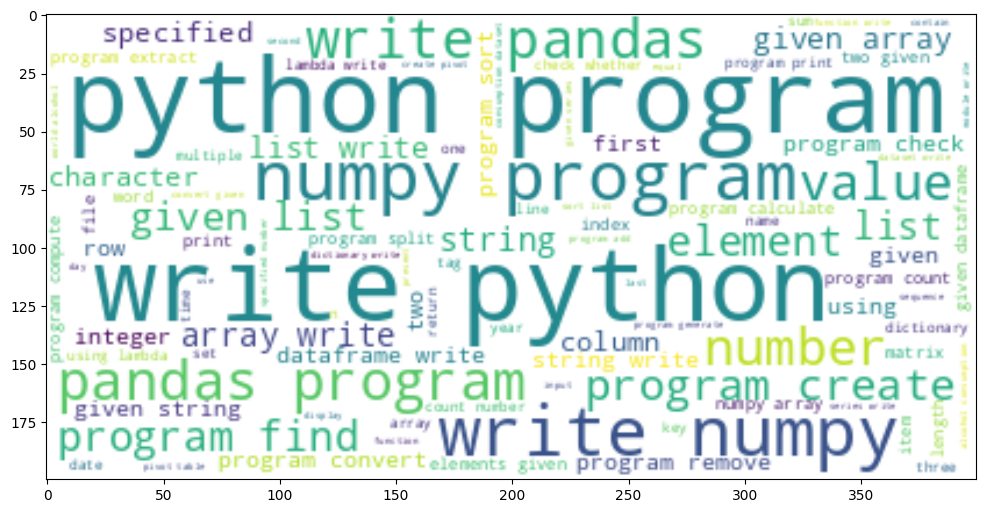

In [108]:
text = ' '.join(i.strip() for i in df['clean_problem'])

#Bigramas: Algunas palabras son importantes verlas juntas. Trigramas tambien.
word_cloud = WordCloud(max_words=2650, background_color='White').generate(text)

plt.figure(figsize=(12,12))

plt.imshow(word_cloud, interpolation='bilinear')

plt.show()

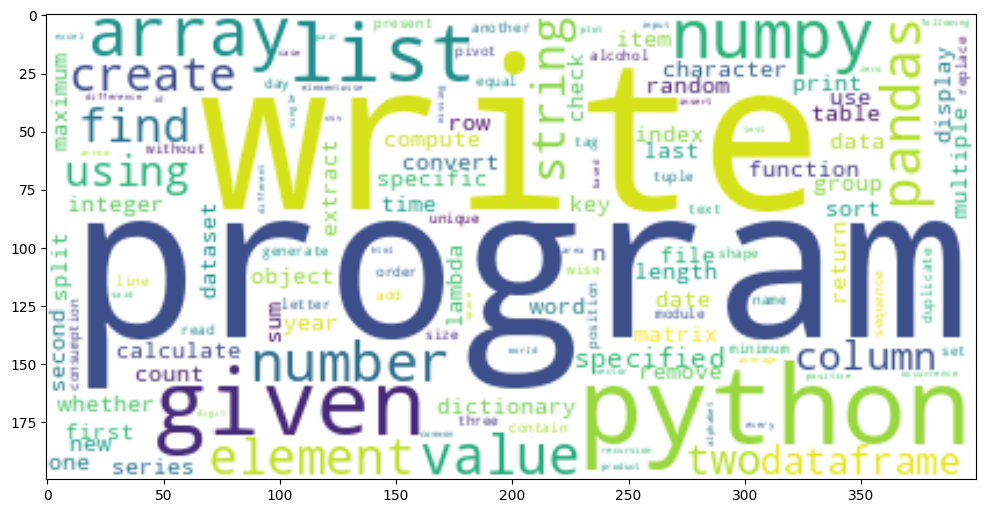

In [109]:
text = ' '.join(i.strip() for i in df['clean_problem'])

word_cloud = WordCloud(max_words=2650, background_color='White', collocations=False).generate(text)

plt.figure(figsize=(12,12))

plt.imshow(word_cloud, interpolation='bilinear')

plt.show()

In [31]:
#NLP Generativo. Para manejar el Python Solution

#Hay que eliminar el comentario en Python Solution. Manualmente, o programaticamente.

# NOTA Pueden haber comentarios inline. 